In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [73]:
df=pd.read_csv('/content/drive/MyDrive/machine learning projects/training set/Ford Car Price Prediction/ford.csv')
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [74]:
df.isnull().sum() # check if there are any null

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


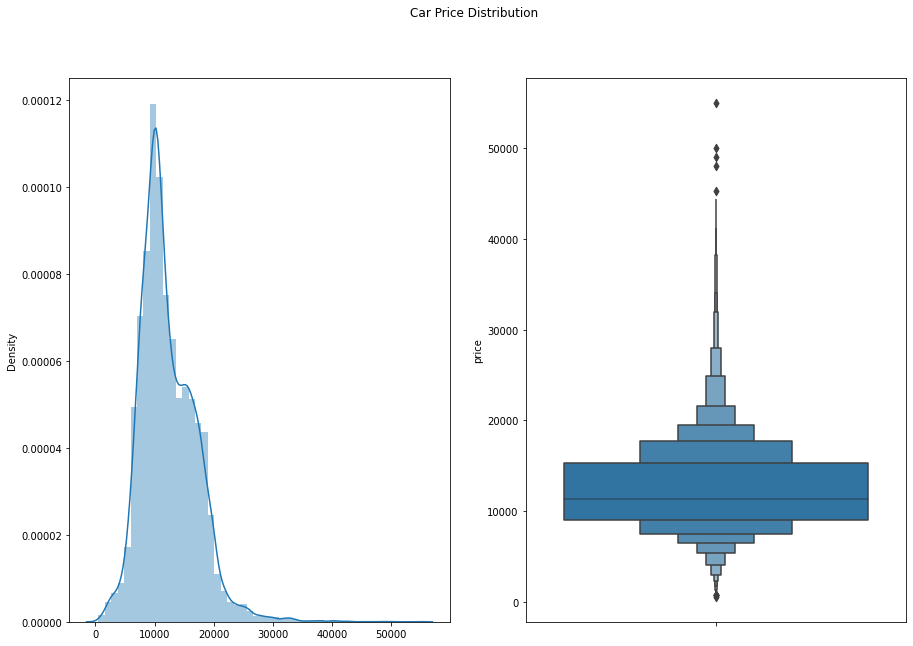

In [75]:
plt.figure(figsize=(15,10))
plt.suptitle('Car Price Distribution')

plt.subplot(1,2,1)
sns.distplot(x=df.price)

plt.subplot(1,2,2)
sns.boxenplot(y=df.price)

In [76]:
df['price'].describe()

count    17966.000000
mean     12279.534844
std       4741.343657
min        495.000000
25%       8999.000000
50%      11291.000000
75%      15299.000000
max      54995.000000
Name: price, dtype: float64

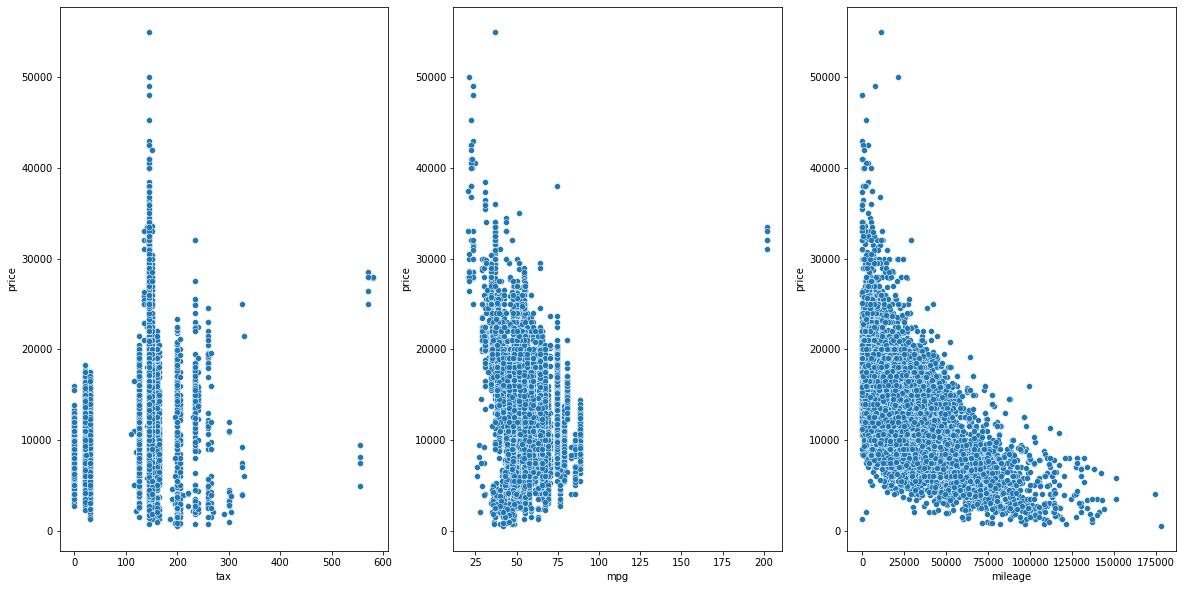

In [77]:
plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
sns.scatterplot(x=df.tax,y=df.price)

plt.subplot(1,3,2)
sns.scatterplot(x=df.mpg,y=df.price)

plt.subplot(1,3,3)
sns.scatterplot(x=df.mileage,y=df.price)

Text(0.5, 1.0, 'Spread Plot')

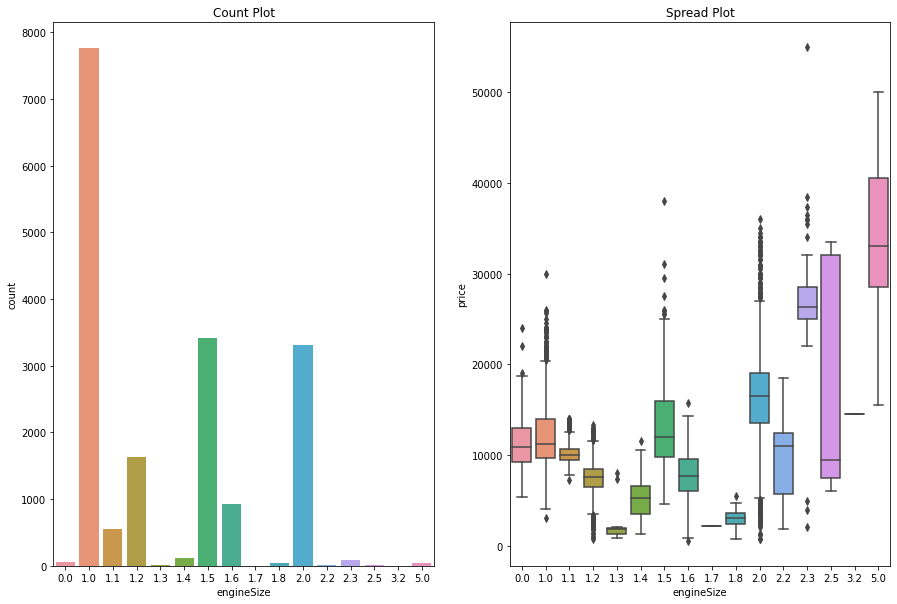

In [78]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
sns.countplot(x=df.engineSize)
plt.title('Count Plot')
plt.subplot(1,2,2)
sns.boxplot(x=df.engineSize,y=df.price)
plt.title('Spread Plot')

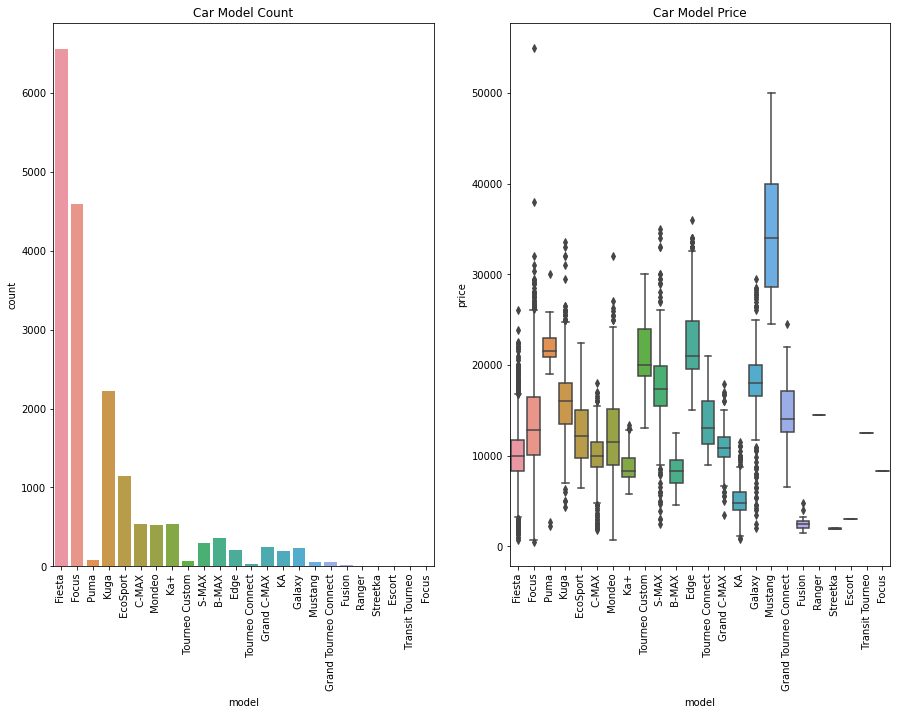

In [79]:
fig,axes = plt.subplots(1,2,figsize=(15,10))

sns.countplot(x=df.model,ax=axes[0])
axes[0].set_title('Car Model Count')
axes[0].tick_params(axis='x',rotation=90)

sns.boxplot(x=df.model,y=df.price,ax=axes[1])
axes[1].set_title('Car Model Price')
axes[1].tick_params(axis='x',rotation=90)

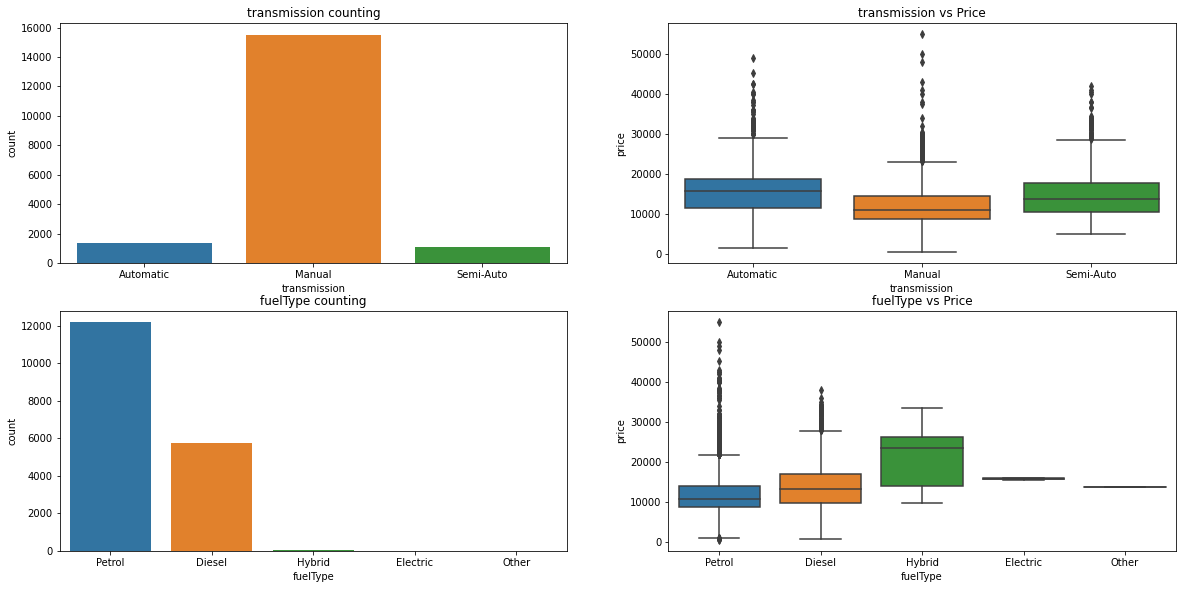

In [80]:
def my_plot(x,y,nr):
    plt.subplot(3,2,nr)
    sns.countplot(x=df[x])
    plt.title(x+' counting')

    plt.subplot(3, 2, nr+1)
    sns.boxplot(x=df[x], y=df[y])
    plt.title(x + ' vs Price')


plt.figure(figsize=(20,15))
my_plot('transmission','price',1)
my_plot('fuelType','price',3)

In [81]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [82]:
len = ['price','mileage','tax','mpg']
df[len]

,price,mileage,tax,mpg
0,12000,15944,150,57.7
1,14000,9083,150,57.7
2,13000,12456,150,57.7
3,17500,10460,145,40.3
4,16500,1482,145,48.7
...,...,...,...,...
17961,8999,16700,150,47.1
17962,7499,40700,30,57.7
17963,9999,7010,20,67.3
17964,8299,5007,145,57.7


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  object 
 1   year          17966 non-null  int64  
 2   price         17966 non-null  int64  
 3   transmission  17966 non-null  object 
 4   mileage       17966 non-null  int64  
 5   fuelType      17966 non-null  object 
 6   tax           17966 non-null  int64  
 7   mpg           17966 non-null  float64
 8   engineSize    17966 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB


In [84]:
#Lets use One-Hot Encoding to convert model ,transmission and fuelType columns.
dummies = pd.get_dummies(df.model)
dummies2 = pd.get_dummies(df.transmission)
dummies3 = pd.get_dummies(df.fuelType)

In [85]:
dummies3.head()

,Diesel,Electric,Hybrid,Other,Petrol
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,0,1


In [86]:
#Join new columns in one dataset
df2 = pd.concat([df,dummies,dummies2,dummies3],axis=1)
df2.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,B-MAX,...,Transit Tourneo,Focus,Automatic,Manual,Semi-Auto,Diesel,Electric,Hybrid,Other,Petrol
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0,0,...,0,0,1,0,0,0,0,0,0,1
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0,0,...,0,0,0,1,0,0,0,0,0,1
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0,0,...,0,0,0,1,0,0,0,0,0,1
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5,0,...,0,0,0,1,0,0,0,0,0,1
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0,0,...,0,0,1,0,0,0,0,0,0,1


In [87]:
#Let's drop the old columns.
df2 = df2.drop(['model','transmission','fuelType'],axis=1)
df2.head()

,year,price,mileage,tax,mpg,engineSize,B-MAX,C-MAX,EcoSport,Edge,...,Transit Tourneo,Focus,Automatic,Manual,Semi-Auto,Diesel,Electric,Hybrid,Other,Petrol
0,2017,12000,15944,150,57.7,1.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,2018,14000,9083,150,57.7,1.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,2017,13000,12456,150,57.7,1.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,2019,17500,10460,145,40.3,1.5,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,2019,16500,1482,145,48.7,1.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [88]:
df=df2

In [89]:
df=df.reset_index(drop=True)

In [90]:
#Scaling Data
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
inputs = ['year','price','mileage','tax','mpg','engineSize']
df[inputs] = mms.fit_transform(df[inputs])
df.head()

,year,price,mileage,tax,mpg,engineSize,B-MAX,C-MAX,EcoSport,Edge,...,Transit Tourneo,Focus,Automatic,Manual,Semi-Auto,Diesel,Electric,Hybrid,Other,Petrol
0,0.328125,0.211101,0.089747,0.258621,0.203867,0.2,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0.343750,0.247798,0.051125,0.258621,0.203867,0.2,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,0.328125,0.229450,0.070113,0.258621,0.203867,0.2,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,0.359375,0.312018,0.058877,0.250000,0.107735,0.3,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,0.359375,0.293670,0.008337,0.250000,0.154144,0.2,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


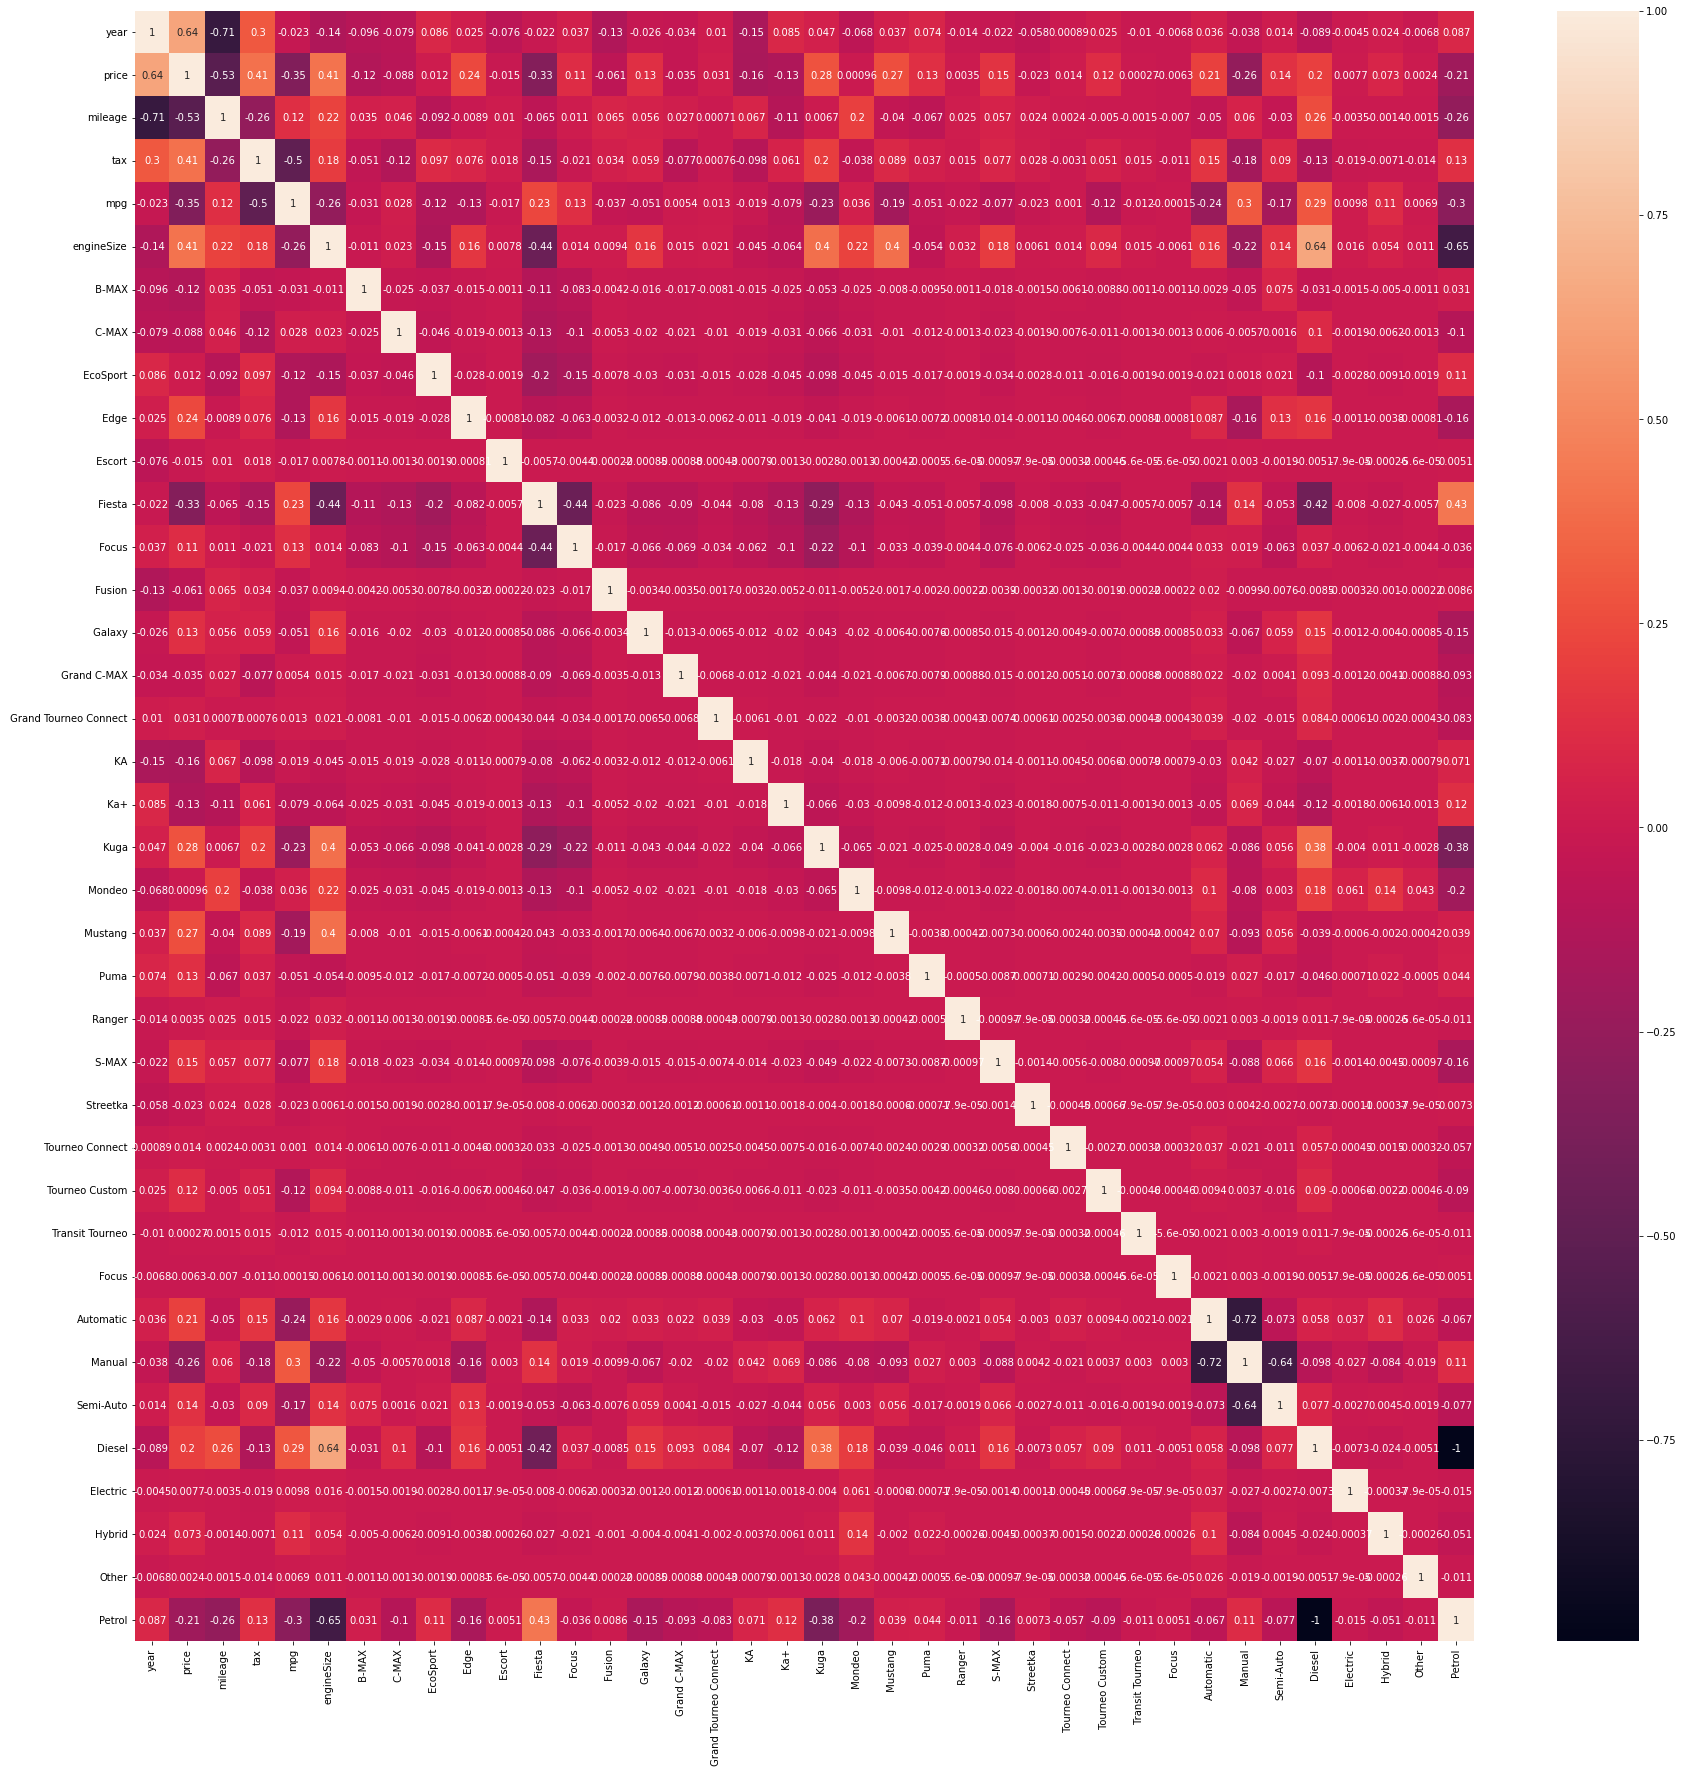

In [91]:
plt.figure(figsize = (30, 30))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [92]:
x = df.drop('price',axis=1)
y= df.price

In [93]:
#Splitting data 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [94]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [95]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
def model_train(x_train,y_train):
  all_models = [LinearRegression(),RandomForestRegressor(),DecisionTreeRegressor()]
  scores = []
  for i in all_models:
    model = i
    model.fit(x_train,y_train)
    y_predicted = model.predict(x_train)
    mse = mean_squared_error(y_train,y_predicted)
    mae = mean_absolute_error(y_train,y_predicted)
    scores.append({
        'model': i,
        'best_score':model.score(x_train,y_train),
        'mean_squared_error':mse,
        'mean_absolute_error':mae
    })
  return pd.DataFrame(scores,columns=['model','best_score','mean_squared_error','mean_absolute_error'])

model_train(x_train,y_train)

,model,best_score,mean_squared_error,mean_absolute_error
0,LinearRegression(),0.842078,0.001196,0.025053
1,"(DecisionTreeRegressor(max_features='auto', ra...",0.989556,0.000079,0.006006
2,DecisionTreeRegressor(),0.999719,0.000002,0.000155


In [96]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
def model_test(x_test,y_test):
  all_models = [LinearRegression(),RandomForestRegressor(),DecisionTreeRegressor()]
  scores = []
  for i in all_models:
    model = i
    model.fit(x_test,y_test)
    y_predicted = model.predict(x_test)
    mse = mean_squared_error(y_test,y_predicted)
    mae = mean_absolute_error(y_test,y_predicted)
    scores.append({
        'model': i,
        'best_score':model.score(x_test,y_test),
        'mean_squared_error':mse,
        'mean_absolute_error':mae
        })
  return pd.DataFrame(scores,columns=['model','best_score','mean_squared_error','mean_absolute_error'])


model_test(x_test,y_test)

,model,best_score,mean_squared_error,mean_absolute_error
0,LinearRegression(),0.853105,1.108397e-03,0.024931
1,"(DecisionTreeRegressor(max_features='auto', ra...",0.989006,8.295526e-05,0.006372
2,DecisionTreeRegressor(),0.999948,3.903356e-07,0.000034


Text(0, 0.5, 'Predicted')

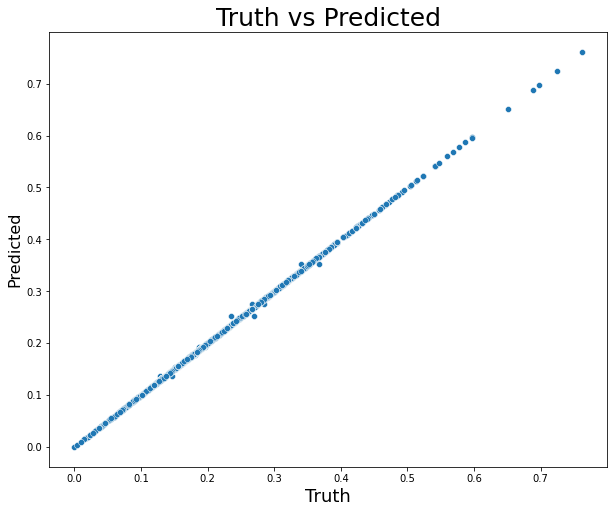

In [97]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(x_test,y_test)
y_predicted = model.predict(x_test)

plt.figure(figsize=(10,8))
plt.title('Truth vs Predicted',fontsize=25)
sns.scatterplot(x = y_test,y = y_predicted)      
plt.xlabel('Truth', fontsize=18)                          
plt.ylabel('Predicted', fontsize=16)   